A more involved example is a bivariate Jump-Diffusion process, that takes the form
$$\begin{pmatrix}
    \mathrm{d}y_1(t) \\ \mathrm{d}y_2(t)
    \end{pmatrix}=
    \begin{pmatrix}
    N_1 \\ N_2
    \end{pmatrix}
    \mathrm{d} t +
    \begin{pmatrix}
    g_{1,1} & g_{1,2} \\
    g_{2,1} & g_{2,2}
    \end{pmatrix}
    \begin{pmatrix}
    \mathrm{d}W_1 \\ \mathrm{d}W_2
    \end{pmatrix}+
    \begin{pmatrix}
    \xi_{1,1} & \xi_{1,2} \\
    \xi_{2,1} & \xi_{2,2}
    \end{pmatrix}
    \begin{pmatrix}
    \mathrm{d}J_1 \\ \mathrm{d}J_2
    \end{pmatrix}
$$
with $(N_1, N_2)$ the drift vector, $g$ the diffusion matrix, and $\xi$ the jump matrix. The term $(\mathrm{d}W_1(t),\mathrm{d}W_2(t))$ comprises the Brownian motions and $(\mathrm{d}J_1, \mathrm{d}J_2)$ comprises the Poisson jumps.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
xi=np.array([[0,0],[0,0.6]])
lambd =  np.array([0, 0.9])

t_final = 9000
t_initial = 0
delta_t = 0.001
time = np.arange(t_initial, t_final , delta_t)

In [2]:

X1=np.loadtxt('2D_jump.dat')

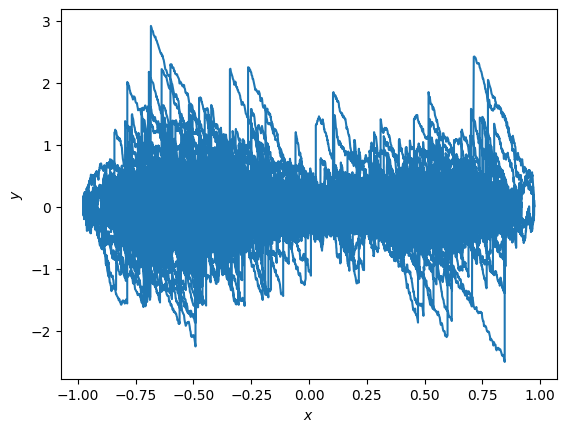

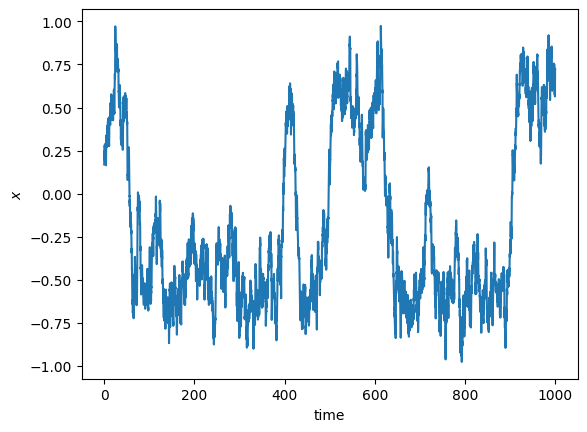

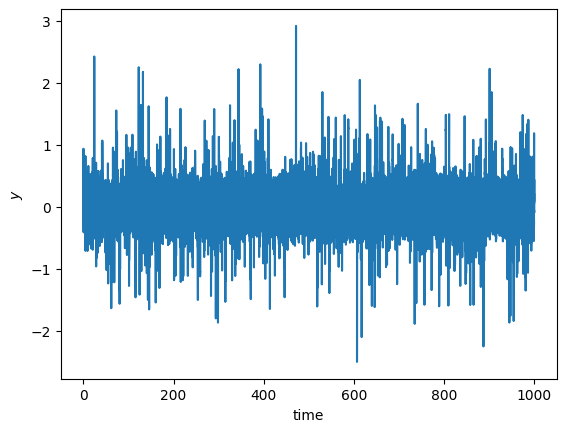

In [3]:


#This is the stochastic trajectory over time
# %matplotlib auto
%matplotlib inline
plt.figure(2)
plt.plot(X1[0:1000000,0], X1[0:1000000,1])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
# plt.legend()

plt.figure(3)
plt.plot(time[0:1000000],X1[0:1000000,0])
plt.xlabel(r'time')
plt.ylabel(r'$x$')
# plt.legend()


plt.figure(4)
plt.plot(time[0:1000000], X1[0:1000000,1])
plt.xlabel(r'time')
plt.ylabel(r'$y$')
# plt.legend()
plt.show(block = True)

In [4]:

from kmc import KM
bins = np.array([900,900])
powers = np.array([[0,0], [1,0], [0,1], [2,0], [0,2], [4,0], [0,4], [6,0], [0,6]])
moments1,edges1=KM(X1, powers = powers,bins=bins)

In [5]:
from kramersmoyal import km
bins = np.array([900,900])
powers = np.array([[0,0], [1,0], [0,1], [2,0], [0,2], [4,0], [0,4], [6,0], [0,6]])
moments, edges = km(X1,bins=bins, powers=powers)

In [6]:
delta_t1=0.001
X_11, X_22 = np.meshgrid(edges1[0],edges1[1])
D00=moments1[0,:,:].T/delta_t1
D10=moments1[1,:,:].T/ delta_t1
D01=moments1[2,:,:].T/ delta_t1
D20=moments1[3,:,:].T/ delta_t1
D02=moments1[4,:,:].T/ delta_t1
D40=moments1[5,:,:].T/ delta_t1
D04=moments1[6,:,:].T/ delta_t1
D60=moments1[7,:,:].T/ delta_t1
D06=moments1[8,:,:].T/ delta_t1

In [7]:
delta_t1=0.001
x_11, x_22 = np.meshgrid(edges[0],edges[1])
d00=moments[0,:,:].T/delta_t1
d10=moments[1,:,:].T/ delta_t1
d01=moments[2,:,:].T/ delta_t1
d20=moments[3,:,:].T/ delta_t1
d02=moments[4,:,:].T/ delta_t1
d40=moments[5,:,:].T/ delta_t1
d04=moments[6,:,:].T/ delta_t1
d60=moments[7,:,:].T/ delta_t1
d06=moments[8,:,:].T/ delta_t1

In [8]:
tol=1e-6
mask=(D00)<tol
D10_=D10*~mask
D01_=D01*~mask
D20_=D20*~mask
D02_=D02*~mask
D40_=D40*~mask
D04_=D04*~mask
D60_=D60*~mask
D06_=D06*~mask
X_11_=X_11*~mask
X_22_=X_22*~mask

In [9]:
tol=1e-6
mask=(d00)<tol

d10_=d10*~mask
d01_=d01*~mask
d20_=d20*~mask
d02_=d02*~mask
d40_=d40*~mask
d04_=d04*~mask
d60_=d60*~mask
d06_=d06*~mask
x_11_=x_11*~mask
x_22_=x_22*~mask

In [10]:

tol= 1e-5
mask1 =np.abs(D04) < tol
temp1 = (D06[~mask1]) / (5 * D04[~mask1])
xi_est1 = np.average(temp1, weights = D00[~mask1])
xi_est1_std= np.abs(xi[1,1]-xi_est1)
print('xi_est1:',xi_est1)
print('xi_est1_std:',xi_est1_std)


temp2 = (D04[~mask1]) / (3 * (xi_est1**2))
lamb_est1 = (np.average(temp2, weights = D00[~mask1]))
lamb_est1 =lamb_est1
lamb_est1_std = np.abs(lambd[1]-lamb_est1)
print('lamb_est1:',lamb_est1)
print('lamb_est1_std:',lamb_est1_std)

xi_est1: 0.5269195032184505
xi_est1_std: 0.07308049678154949
lamb_est1: 0.9576354008270777
lamb_est1_std: 0.05763540082707763


In [11]:
tol= 1e-5
mask1 =np.abs(d04) < tol
temp1 = (d06[~mask1]) / (5 * d04[~mask1])
xi_est1k = np.average(temp1, weights = d00[~mask1])
xi_est1_stdk= np.abs(xi[1,1]-xi_est1k)
print('xi_est1:',xi_est1k)
print('xi_est1_std:',xi_est1_stdk)


temp2 = (d04[~mask1]) / (3 * (xi_est1**2))
lamb_est1k = (np.average(temp2, weights = d00[~mask1]))
lamb_est1k =lamb_est1k
lamb_est1_stdk = np.abs(lambd[1]-lamb_est1k)
print('lamb_est1:',lamb_est1k)
print('lamb_est1_std:',lamb_est1_stdk)

xi_est1: 0.011175631961983831
xi_est1_std: 0.5888243680380162
lamb_est1: 0.03989869116353659
lamb_est1_std: 0.8601013088364634


In [12]:

def xydf(X_11,X_22):
    a10=X_22
    a01=X_11-10*X_22-3*X_11**3
    b10=((np.ones_like(X_11)*0))
    b01=((np.ones_like(X_22)*0.8))
    return a10,a01,b10,b01

X_101=X_11[:,:]
X_102=X_22[:,:]
D10_=D10_[:,:]
a10,_,_,_=xydf(X_101,X_102)

X_011=X_11[:,:]#80#25#23#19
X_012=X_22[:,:]
D01_=D01_[:,:]
_,a01,_,_=xydf(X_011,X_012)

X_201=X_11[:,:]
X_202=X_22[:,:]
D20_=D20_[:,:]
_,_,b10,_=xydf(X_201,X_202)

X_021=X_11[:,:]
X_022=X_22[:,:]
D02_=np.sqrt(D02[:,:]-(xi_est1*lamb_est1))
_,_,_,b01=xydf(X_021,X_022)


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_3144\1385952261.py:25: RuntimeWarning: invalid value encountered in sqrt
  D02_=np.sqrt(D02[:,:]-(xi_est1*lamb_est1))


In [13]:

def xydf(x_11,x_22):
    a10=x_22
    a01=x_11-10*x_22-3*x_11**3
    b10=((np.ones_like(x_11)*0))
    b01=((np.ones_like(x_22)*0.8))
    return a10,a01,b10,b01

x_101=x_11[:,:]
x_102=x_22[:,:]
d10_=d10_[:,:]
A10,_,_,_=xydf(x_101,x_102)

x_011=x_11[:,:]#80#25#23#19
x_012=x_22[:,:]
d01_=d01_[:,:]
_,A01,_,_=xydf(x_011,x_012)

x_201=x_11[:,:]
x_202=x_22[:,:]
d20_=d20_[:,:]
_,_,B10,_=xydf(x_201,x_202)

x_021=x_11[:,:]
x_022=x_22[:,:]
d02_=np.sqrt(d02[:,:]*2-(xi_est1k*lamb_est1k))#
_,_,_,B01=xydf(x_021,x_022)


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_3144\1828924653.py:25: RuntimeWarning: invalid value encountered in sqrt
  d02_=np.sqrt(d02[:,:]*2-(xi_est1k*lamb_est1k))#


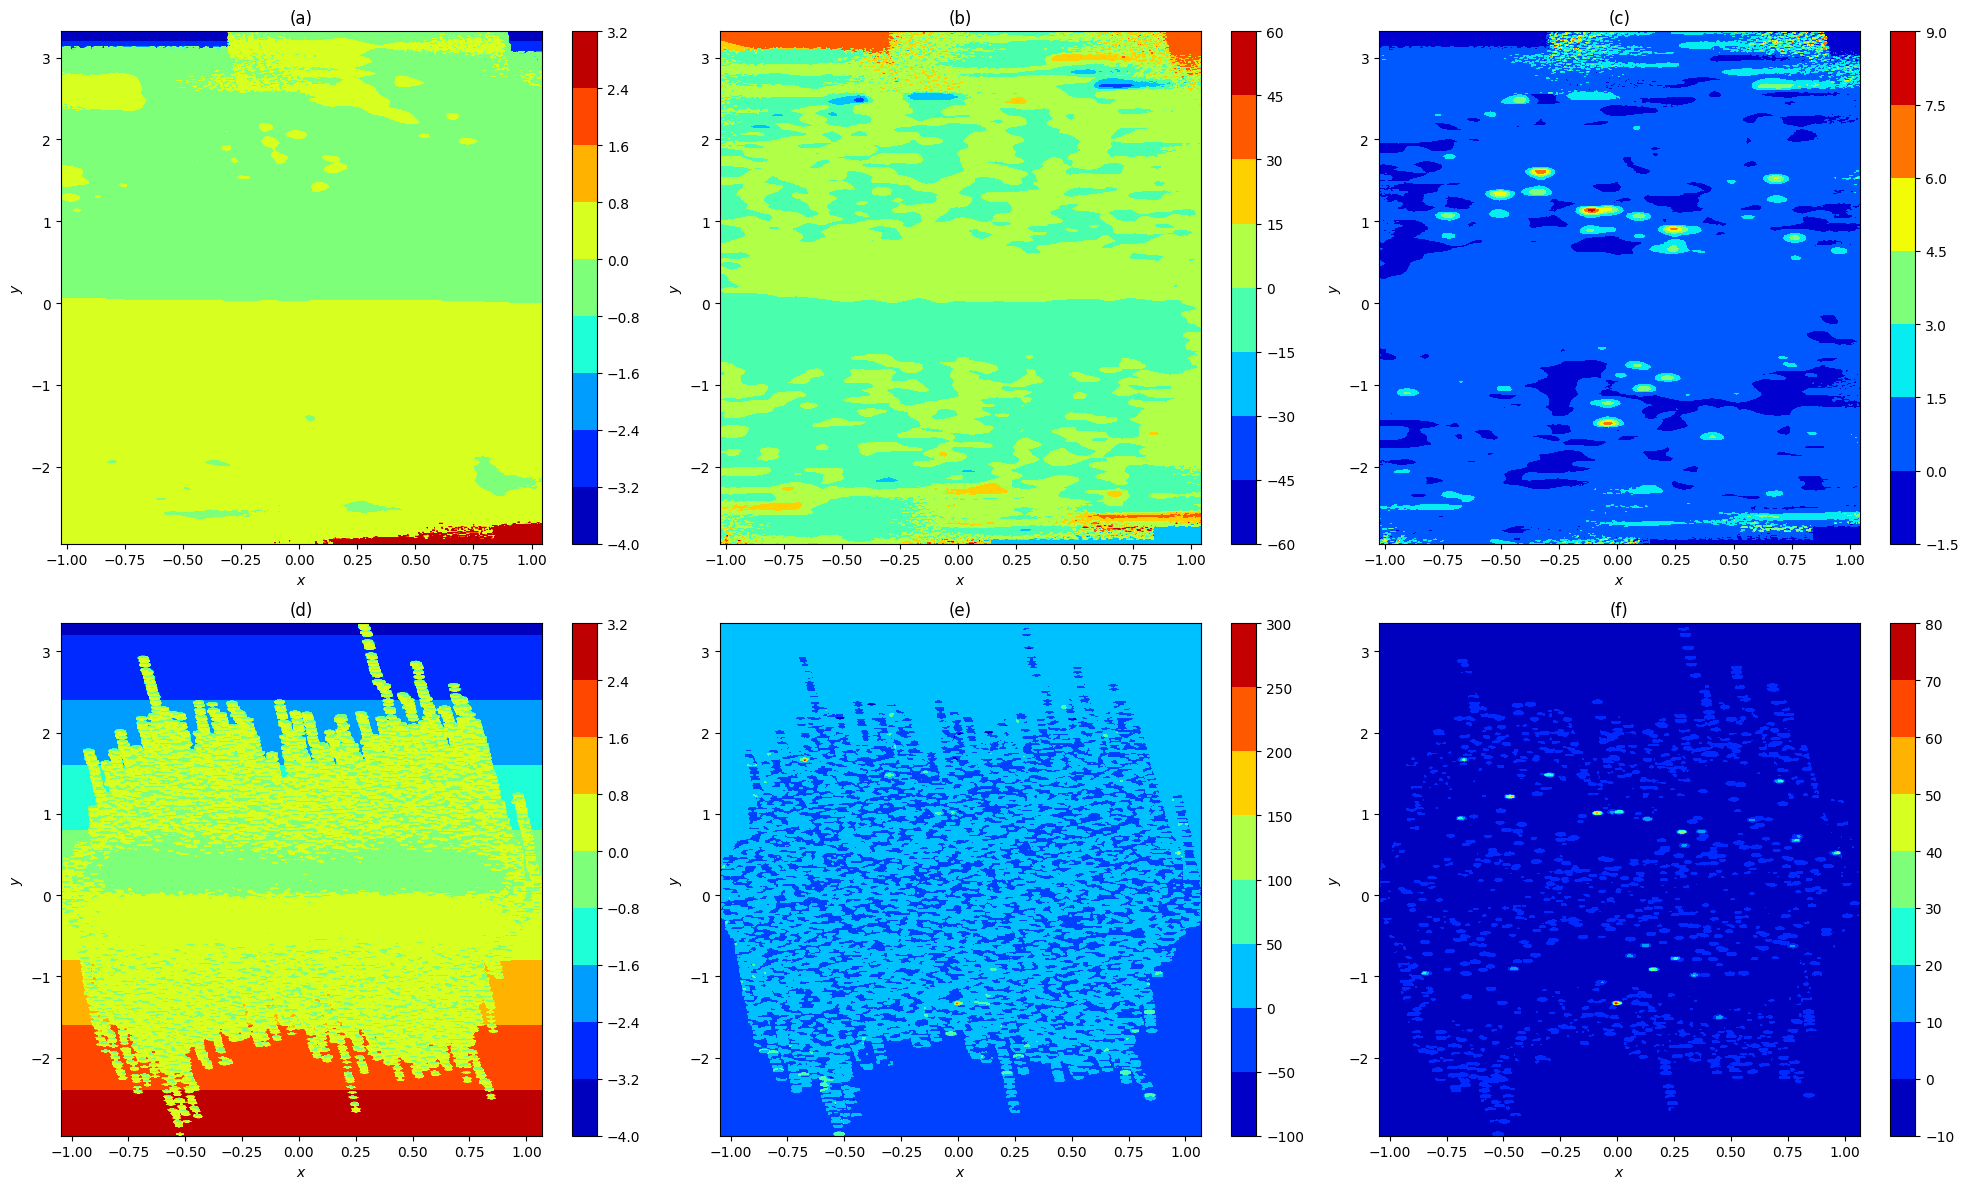

In [14]:
# erro of pdf------------
%matplotlib inline
fig3 = plt.figure(341,figsize=(20,12))

erro1 = D10-a10
ax3 = fig3.add_subplot(231)
ct = ax3.contourf(X_11, X_22, erro1, cmap='jet')  # jet/hot/sum
plt.colorbar(ct)
ax3.set_xlabel('$x$')
ax3.set_ylabel('$y$')
plt.title('(a)')

# fig3 = plt.figure(342)
erro2 = D01-a01
ax3 = fig3.add_subplot(232)
ct = ax3.contourf(X_11, X_22, erro2, cmap='jet')  # jet/hot/sum
plt.colorbar(ct)
ax3.set_xlabel('$x$')
ax3.set_ylabel('$y$')
plt.title('(b)')

# # fig3 = plt.figure(343)
# erro4 = D20-b10
# ax3 = fig3.add_subplot(233)
# ct = ax3.contourf(X_11, X_22, erro4, cmap='jet', )  # jet/hot/sum
# plt.colorbar(ct)
# ax3.set_xlabel('$x$')
# ax3.set_ylabel('$y$')
# plt.title('Error')

# fig3 = plt.figure(344)
erro3 = D02-b01
ax3 = fig3.add_subplot(233)
ct = ax3.contourf(X_11, X_22, erro3, cmap='jet')  # jet/hot/sum
plt.colorbar(ct)
ax3.set_xlabel('$x$')
ax3.set_ylabel('$y$')
plt.title('(c)')
##########kramersmoyal
erro1k = d10-A10
ax3 = fig3.add_subplot(234)
ct = ax3.contourf(x_11, x_22, erro1k, cmap='jet')  # jet/hot/sum
plt.colorbar(ct)
ax3.set_xlabel('$x$')
ax3.set_ylabel('$y$')
plt.title('(d)')

# fig3 = plt.figure(342)
erro2k = d01-A01
ax3 = fig3.add_subplot(235)
ct = ax3.contourf(x_11, x_22, erro2k, cmap='jet')  # jet/hot/sum
plt.colorbar(ct)
ax3.set_xlabel('$x$')
ax3.set_ylabel('$y$')
plt.title('(e)')

# # fig3 = plt.figure(343)
# erro4 = D20-b10
# ax3 = fig3.add_subplot(233)
# ct = ax3.contourf(X_11, X_22, erro4, cmap='jet', )  # jet/hot/sum
# plt.colorbar(ct)
# ax3.set_xlabel('$x$')
# ax3.set_ylabel('$y$')
# plt.title('Error')

# fig3 = plt.figure(344)
erro3k = d02-B01
ax3 = fig3.add_subplot(236)
ct = ax3.contourf(x_11, x_22, erro3k, cmap='jet')  # jet/hot/sum
plt.colorbar(ct)
ax3.set_xlabel('$x$')
ax3.set_ylabel('$y$')
plt.title('(f)')
fig3.tight_layout(w_pad=0.5, h_pad=1)
plt.show(block=True)

In [16]:
import numpy as np
# from scipy.integrate import odeint
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def library(x,librarystyle):
    # x1, x2 = x[:, 0], x[:, 1]
    # return np.transpose([np.ones_like(x1), x1, x2, x1**2, x2**2, x1*x2, np.abs(x1-x2), np.abs(x1+x2)])
    x[np.isnan(x)]=0
    if librarystyle == 'poly_library':
        poly = PolynomialFeatures(degree=3,include_bias=True).fit(x)
        X_poly = poly.fit_transform(x)
        clumns_list = poly.get_feature_names_out()
        Theta=X_poly
        print(clumns_list)
    elif librarystyle == 'fourier_library':
        Theta=np.hstack([np.sin(x),np.cos(x)])
        print('sin(x)','cos(x)')
    elif librarystyle == 'generalized_library':
        poly = PolynomialFeatures(degree=3,include_bias=True).fit(x)
        X_poly = poly.fit_transform(x)
        clumns_list = poly.get_feature_names_out()
        Theta=X_poly
        print(clumns_list,'sin(x)','cos(x)')
        Theta=np.hstack([X_poly, np.sin(x),np.cos(x)])
    
    return Theta

def sparse_regression(X, y):
    model = LinearRegression(fit_intercept=False)
    # model = Lasso(alpha=0.00001, fit_intercept=False, max_iter=100000)
    model.fit(X, y)
    return model.coef_,model.intercept_

def SINDy(X, dx, librarystyle:str,threshold=0.5):
    # pool data & compute library
    dx[np.isnan(dx)]=0
    Theta = library(X,librarystyle)
    for i in range(Theta.shape[1]):
        Xi,intercept_ = sparse_regression(Theta, dx)
        # thresholding
        small_idx = np.abs(Xi) < threshold
        Xi[small_idx] = 0
        Theta[:,small_idx]=0
    return Xi

yn1=D10_.ravel()
yn2=D01_.ravel()
yn3=D20_.ravel()
yn4=D02_.ravel()
xx1=X_11_.ravel()
xx2=X_22_.ravel()
XX=(np.squeeze(np.array((xx1,xx2)))).T

P11=SINDy(XX,yn1,librarystyle='poly_library')
print(P11)
P21=SINDy(XX,yn2,librarystyle='poly_library')
print(P21)
P31=SINDy(XX,yn3,librarystyle='poly_library')
print(P31)
P41=SINDy(XX,yn4,librarystyle='poly_library')
print(P41)

['1' 'x0' 'x1' 'x0^2' 'x0 x1' 'x1^2' 'x0^3' 'x0^2 x1' 'x0 x1^2' 'x1^3']
[0.         0.         0.97103505 0.         0.         0.
 0.         0.         0.         0.        ]
['1' 'x0' 'x1' 'x0^2' 'x0 x1' 'x1^2' 'x0^3' 'x0^2 x1' 'x0 x1^2' 'x1^3']
[  0.           1.62614582 -10.06403183   0.           0.
   0.          -2.50977571   0.           0.           0.        ]
['1' 'x0' 'x1' 'x0^2' 'x0 x1' 'x1^2' 'x0^3' 'x0^2 x1' 'x0 x1^2' 'x1^3']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
['1' 'x0' 'x1' 'x0^2' 'x0 x1' 'x1^2' 'x0^3' 'x0^2 x1' 'x0 x1^2' 'x1^3']
[0.75138316 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
